# Sales Prediction based on Advertisement

In [49]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [50]:
# reading data
advertisement = pd.read_csv(r"D:\College\Academics\SEM 3\Data Mining\Datasets\advertising.csv")

## Data Exploration 

In [51]:
# viewing the dataset
display(advertisement.head(),advertisement.tail())

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [64]:
advertisement.shape

(200, 4)

**Inference:** Data has 200 rows and 4 columns

In [65]:
advertisement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [66]:
advertisement.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning 

In [68]:
# checking for null values in the dataset
advertisement.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Inference:** There are no null value, the dataset is clean

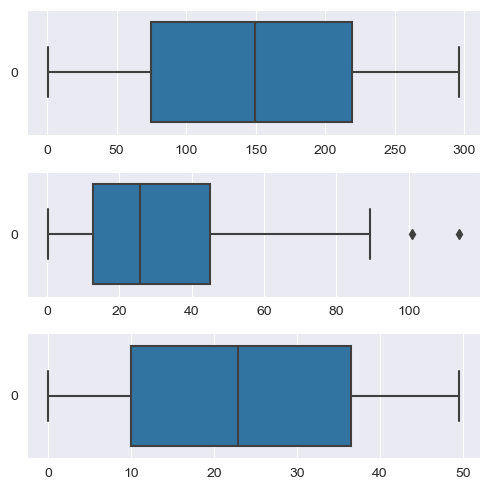

In [92]:
# outlier analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertisement['TV'], ax = axs[0], orient = "h")
plt2 = sns.boxplot(advertisement['Newspaper'], ax = axs[1], orient = "h")
plt3 = sns.boxplot(advertisement['Radio'], ax = axs[2], orient = "h")
plt.tight_layout()

**Inference:** We see no significant outliers in the data

In [53]:
# calculating correlation of all columns i.e TV, Radio and Newspaper with Sales
advertisement.corr()*100

,TV,Radio,Newspaper,Sales
TV,100.000000,5.480866,5.664787,90.120791
Radio,5.480866,100.000000,35.410375,34.963110
Newspaper,5.664787,35.410375,100.000000,15.796003
Sales,90.120791,34.963110,15.796003,100.000000


**Inference:** Since TV advertisement has the best correlation with Sales, we will be making a linear model on that

In [54]:
# defining independent (TV) and dependent (Sales) variable
x = advertisement['TV']
y = advertisement['Sales']

In [55]:
# defining linear model
reg = LinearRegression()

In [56]:
# reshaping x i.e independent variable
x = x.array.reshape(-1, 1)

In [57]:
reg.fit(x,y)

LinearRegression()

In [58]:
#predicting y based on x
y_pred = reg.predict(x)

In [60]:
coef = reg.coef_
intercept = reg.intercept_

In [61]:
# checking coefficient and intercept
print(coef,intercept)

[0.05546477] 6.974821488229891


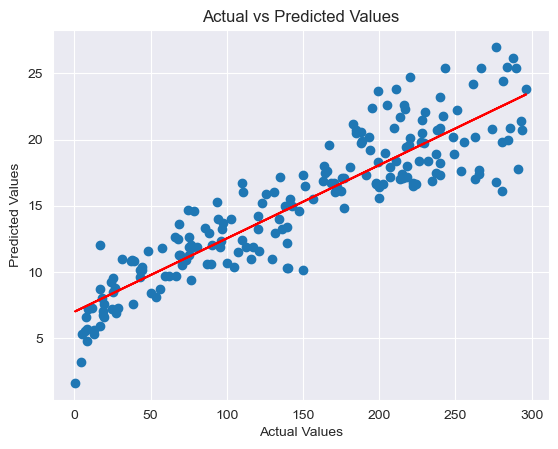

In [59]:
plt.scatter(x,y)
plt.plot(x,y_pred,color = 'red')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

## Model Evaluation

In [62]:
# calculating the error
mse = mean_squared_error(y,y_pred)
mse

5.2177438977951285

In [93]:
# residual analysis
residual = (y_pred - y)

C:\Users\Asif Sayyed\AppData\Local\Temp\ipykernel_21796\894895262.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)


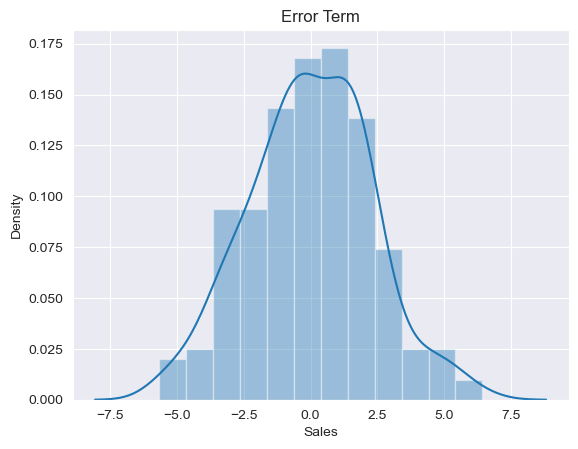

In [103]:
sns.distplot(residual)
plt.title("Error Term")
plt.show()

**Inference:** The residual  is normally distributed with the mean 0

# Predicting Value using `y = m*x+c`
<hr>
Where <br>
m -> Intercept <br>
c -> Slope

In [112]:
# manually predicting value if x = 50
# y = m * x + c
man_y = intercept*50+coef
print(man_y)

[348.79653918]


Defining a function to carry out the same

In [121]:
def FindTvSales(value):
    pred = intercept*value+coef
    return print("If the money spent on TV advertisement is",value,"the sales will be",pred)

In [123]:
FindTvSales(500)

If the money spent on TV advertisement is 500 the sales will be [3487.46620889]


<strong>Author</strong> <br>
Asif Sayyed<hr>
<b> Thanks for reading my code, ⭐ Star my repository if you find it useful </b><br>
<div>
    <li><a href="https://www.linkedin.com/in/sayyedasif/">LinkedIn</a></li>
    <li><a href="https://www.credly.com/users/asif-sayyed.fef49659/badges">Credly</a></li>
    <li><a href="https://asifdotexe.github.io/">Portfolio</a></li>
<div>